In [23]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
#open the csv file and read the data
df = pd.read_csv("data/latent_vectors_3.csv", header=None)

In [25]:
# K-means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df)

# Get cluster labels
labels = kmeans.labels_

InvalidIndexError: (slice(None, None, None), 0)

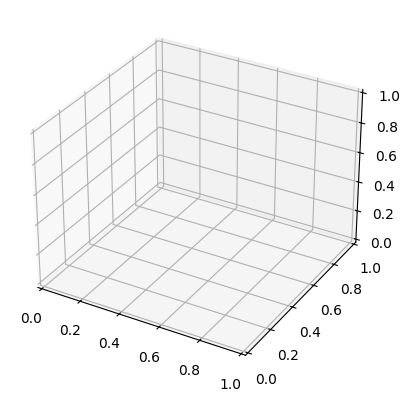

In [5]:
# Visualize the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a colormap
colors = plt.cm.jet(np.linspace(0, 1, num_clusters))

for i in range(num_clusters):
    points = df[labels == i]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=[colors[i]], label=f'Cluster {i+1}')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend()
plt.show()

In [26]:
#add labels to the csv file
df['labels'] = labels
df.to_csv("latent_vectors_3.csv", index=False, header=False)

In [28]:
#number of points in each cluster along with its language
print(df['labels'].value_counts())

labels
1    177
0     43
3     40
2     40
Name: count, dtype: int64


In [29]:
import json
import pandas as pd

def add_cluster_labels(csv_file, json_file, output_file):
    # Read the CSV file with latent vectors and labels
    df = pd.read_csv(csv_file, header=None, names=['x', 'y', 'z', 'label'])

    # Read the JSON file with articles
    with open(json_file, 'r') as f:
        articles = json.load(f)

    # Add cluster labels to each article
    for i, article in enumerate(articles):
        if i < len(df):
            article['cluster'] = int(df.iloc[i]['label'])

    # Write the updated articles back to the output JSON file
    with open(output_file, 'w') as f:
        json.dump(articles, f, indent=4)


In [30]:
add_cluster_labels("latent_vectors_3.csv", "data/summary_all.json", "data/summary_cluster_all.json")

In [4]:
import json
#language of the articles in each cluster
def cluster_languages(json_file):
    with open(json_file, 'r') as f:
        articles = json.load(f)

    clusters = {}
    for article in articles:
        cluster = article['cluster']
        language = article['lang']
        if cluster not in clusters:
            clusters[cluster] = {}
        if language not in clusters[cluster]:
            clusters[cluster][language] = 0
        clusters[cluster][language] += 1

    return clusters

cluster_languages("filtered_output.json")

{1: {'eng': 14, 'hin': 17}, 0: {'eng': 2, 'hin': 1}}

In [7]:
from collections import defaultdict

# Define the input file path
input_file_path = 'filtered_output.json'

# Load JSON data from the input file
with open(input_file_path, 'r') as input_file:
    data = json.load(input_file)

# Initialize a nested dictionary to hold the distribution of answers by language and question number
language_distribution = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# Iterate through each article and update the distribution
for article in data:
    lang = article.get("lang", "unknown")
    narrative_answers = article.get("narrative_answers", {})
    for question, answer in narrative_answers.items():
        language_distribution[lang][question][answer] += 1

# Convert defaultdict to a regular dict for easier viewing
language_distribution = {
    lang: {question: dict(answers) for question, answers in questions.items()}
    for lang, questions in language_distribution.items()
}

# Print the distribution of answers by language and question number
for lang, questions in language_distribution.items():
    print(f"Language: {lang}")
    for question, answers in questions.items():
        print(f"  Question {question}:")
        for answer, count in answers.items():
            print(f"    Answer {answer}: {count}")

Language: eng
  Question 1:
    Answer A: 5
    Answer C: 5
    Answer B: 6
  Question 2:
    Answer A: 4
    Answer C: 6
    Answer B: 6
  Question 3:
    Answer A: 6
    Answer C: 4
    Answer B: 6
  Question 4:
    Answer A: 6
    Answer C: 9
    Answer B: 1
  Question 5:
    Answer C: 15
    Answer A: 1
  Question 6:
    Answer C: 16
  Question 7:
    Answer C: 15
    Answer B: 1
  Question 8:
    Answer A: 8
    Answer C: 8
  Question 9:
    Answer B: 12
    Answer C: 3
    Answer A: 1
  Question 10:
    Answer B: 9
    Answer C: 4
    Answer A: 3
Language: hin
  Question 1:
    Answer B: 2
    Answer C: 10
    Answer A: 6
  Question 2:
    Answer B: 7
    Answer C: 10
    Answer A: 1
  Question 3:
    Answer B: 2
    Answer C: 14
    Answer A: 2
  Question 4:
    Answer B: 1
    Answer C: 11
    Answer A: 6
  Question 5:
    Answer A: 8
    Answer C: 10
  Question 6:
    Answer B: 1
    Answer C: 17
  Question 7:
    Answer C: 16
    Answer B: 2
  Question 8:
    Answer C: 11
   

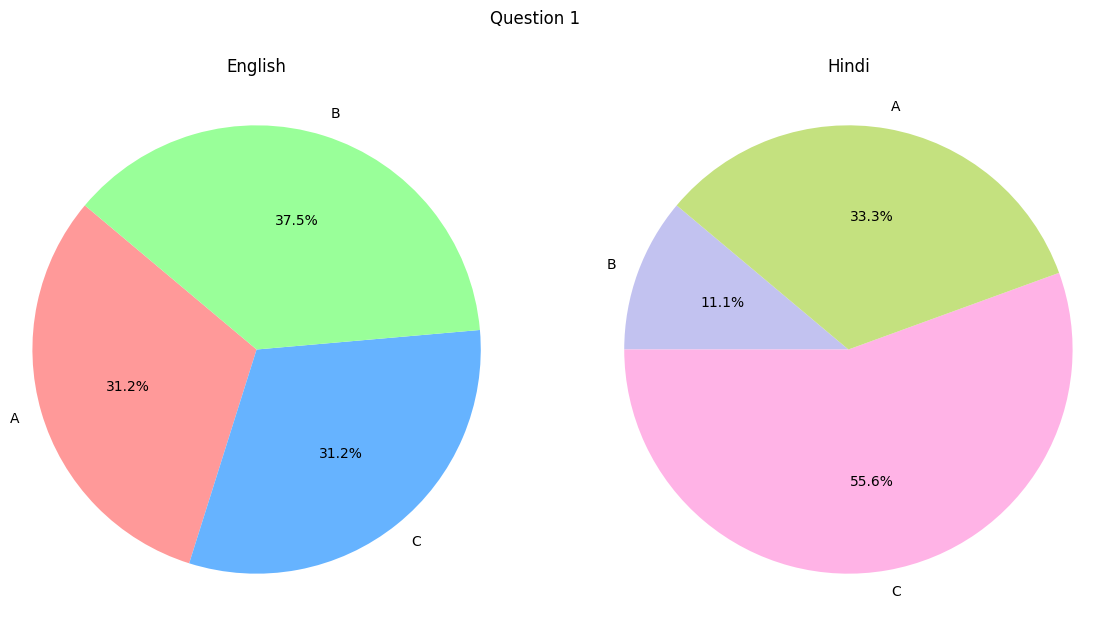

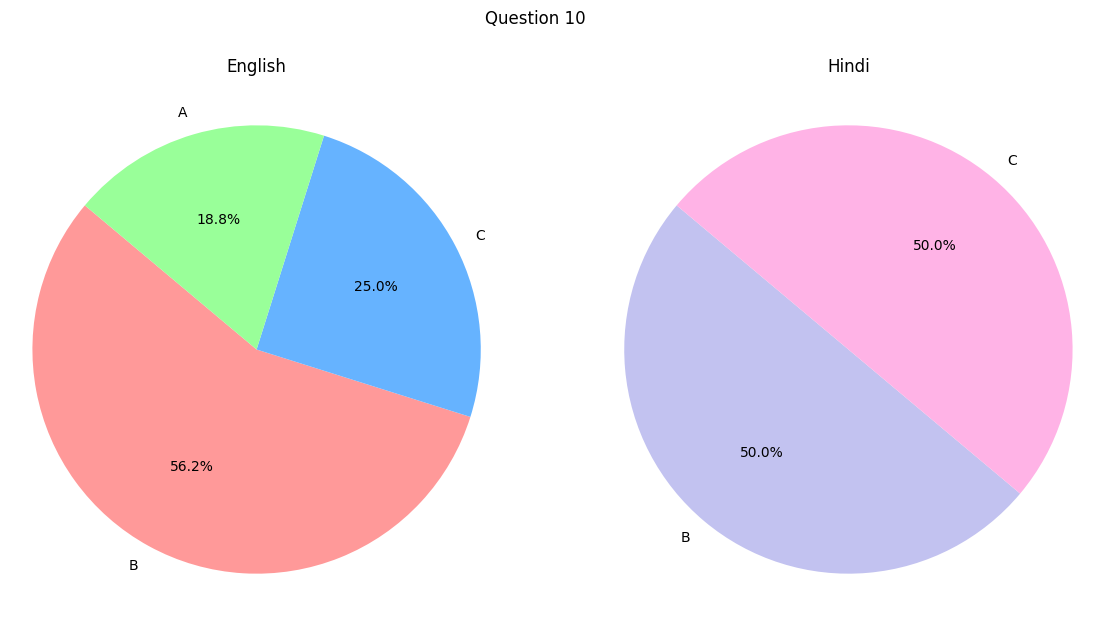

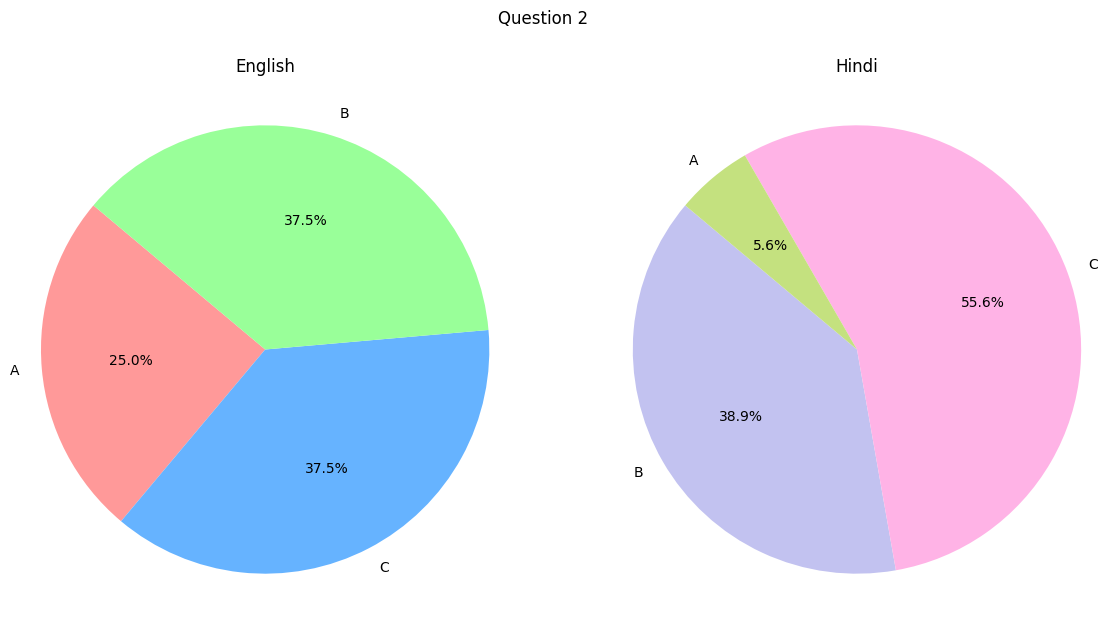

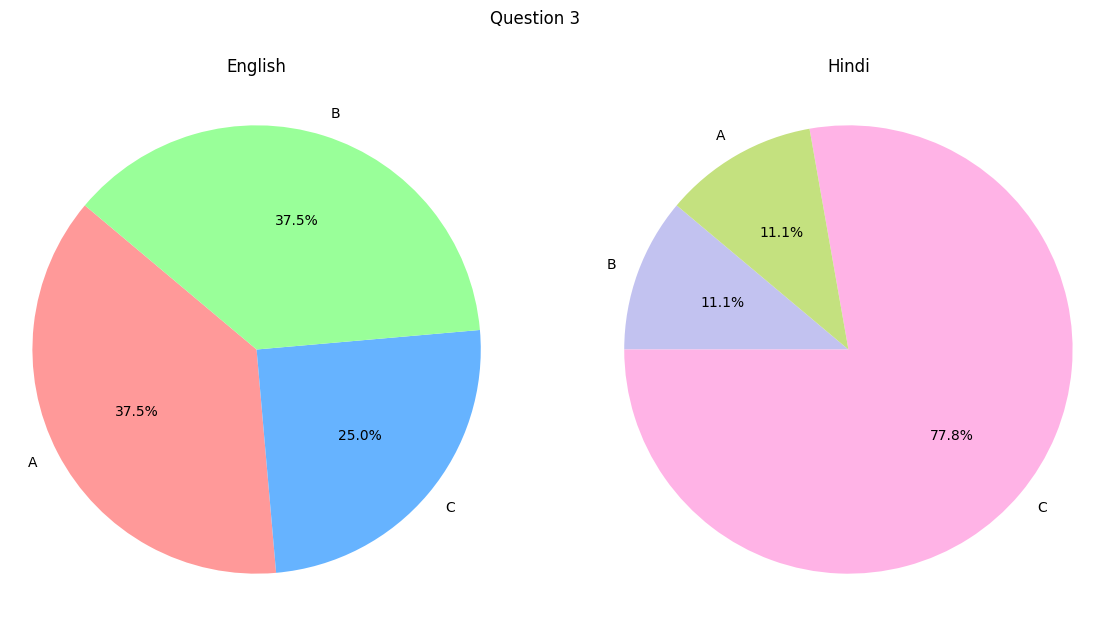

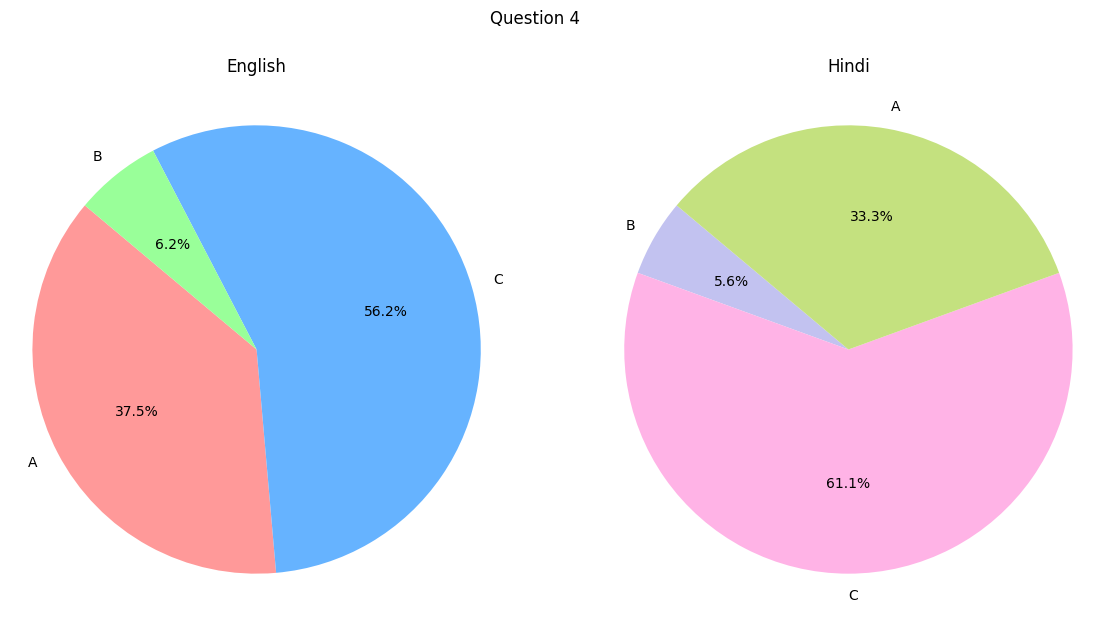

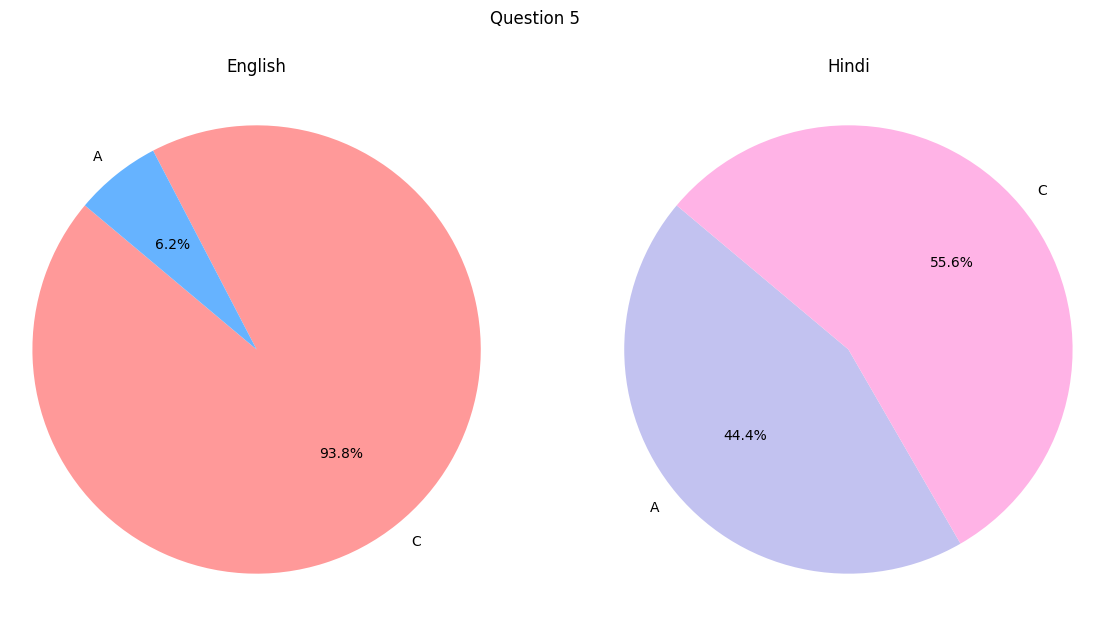

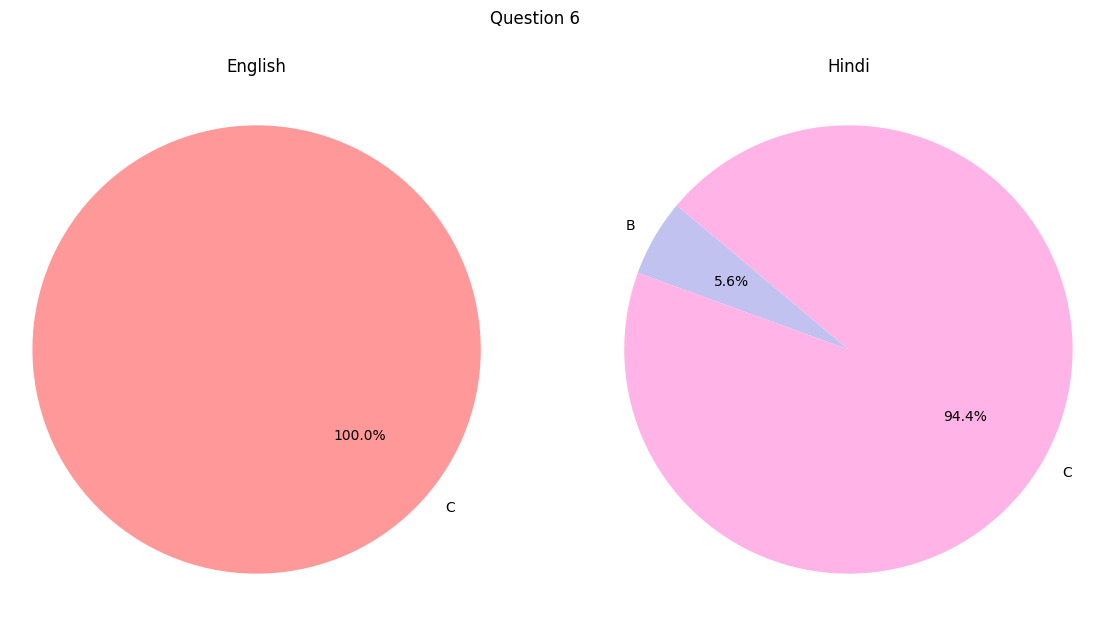

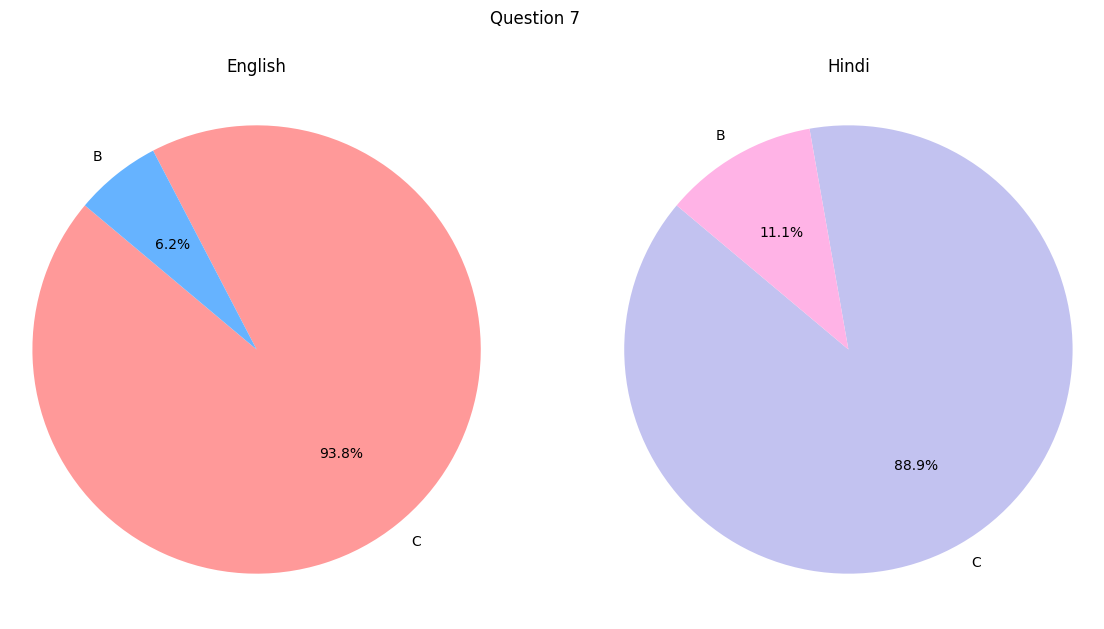

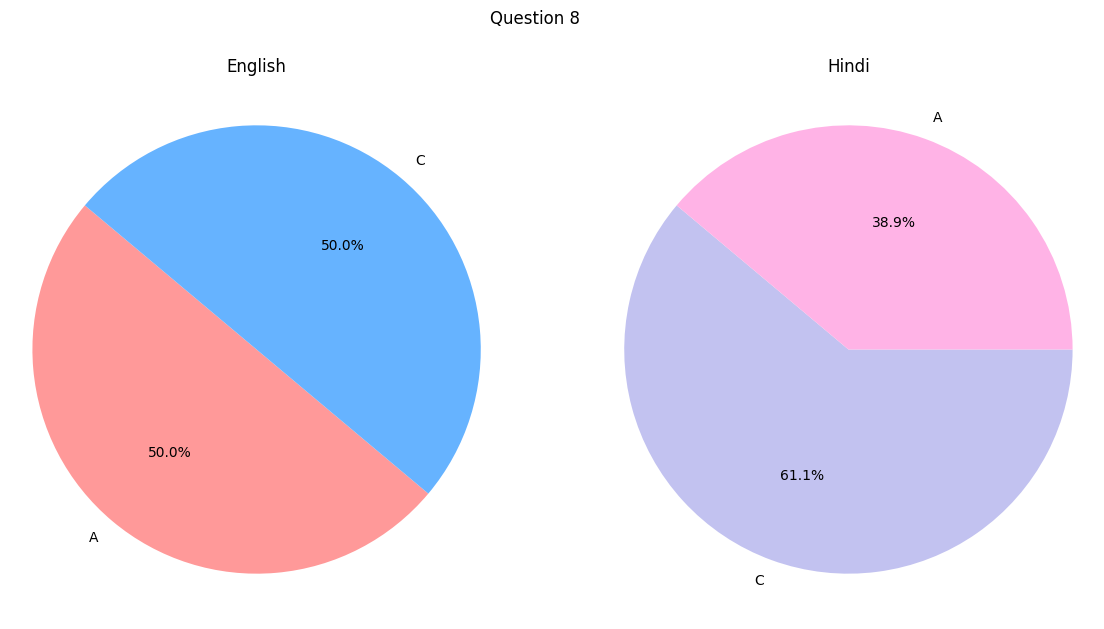

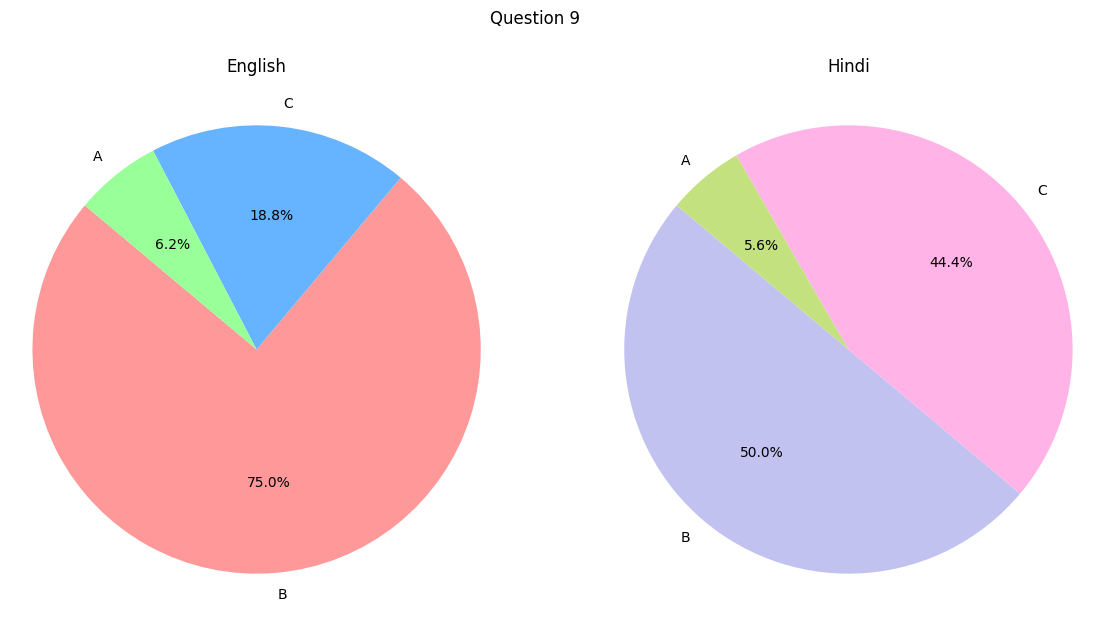

In [19]:
import matplotlib.pyplot as plt
# Define the input file path
input_file_path = 'filtered_output.json'

# Load JSON data from the input file
with open(input_file_path, 'r') as input_file:
    data = json.load(input_file)

# Initialize a nested dictionary to hold the distribution of answers by language and question number
language_distribution = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# Iterate through each article and update the distribution
for article in data:
    lang = article.get("lang", "unknown")
    narrative_answers = article.get("narrative_answers", {})
    for question, answer in narrative_answers.items():
        language_distribution[lang][question][answer] += 1

# Convert defaultdict to a regular dict for easier viewing
language_distribution = {
    lang: {question: dict(answers) for question, answers in questions.items()}
    for lang, questions in language_distribution.items()
}

# Define colors for English and Hindi
colors_eng = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors_hin = ['#c2c2f0','#ffb3e6','#c4e17f','#76d7c4']

# Create side-by-side pie charts for each question
questions = set()
for lang in language_distribution:
    questions.update(language_distribution[lang].keys())

for question in sorted(questions):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle(f'Question {question}')

    # English
    eng_answers = language_distribution.get('eng', {}).get(question, {})
    eng_labels = eng_answers.keys()
    eng_sizes = eng_answers.values()
    axes[0].pie(eng_sizes, labels=eng_labels, autopct='%1.1f%%', colors=colors_eng, startangle=140)
    axes[0].set_title('English')
    axes[0].axis('equal')

    # Hindi
    hin_answers = language_distribution.get('hin', {}).get(question, {})
    hin_labels = hin_answers.keys()
    hin_sizes = hin_answers.values()
    axes[1].pie(hin_sizes, labels=hin_labels, autopct='%1.1f%%', colors=colors_hin, startangle=140)
    axes[1].set_title('Hindi')
    axes[1].axis('equal')

    plt.show()